Since there were some problems with multiple files I am going to just do a single file

In [1]:
# Load the libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import os

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 30, 20

In [3]:
file = 'testerfile.py'

### Read the file and get the all the import statements

In [4]:
with open(file) as f:
    content = f.readlines()

### Remove an extra whitespace in the beginning and end of the line

In [5]:
content = [i.lstrip().rstrip() for i in content]

In [6]:
values_2 = []

Eventually fix below because it doesn't work for multiline imports

### Read through the lines and only keep statments with import or from in the front

In [7]:
for i in content:
    if(i[0:6] == 'import' or i[0:4] == 'from'):
        values_2.append(i)

What we are going to do is make sure this works for the tests I did for the testerfile.py

The plan here is to try to use a while loop instead of a for loop

### Get all the necessary libaries with their parents and children and place them in a list

In [8]:
# The list with all the modules or module paths (something.something)
node_list = []
error_list = []

In [9]:
while(values_2 != []):
    if(',' in values_2[0]):
        if(values_2[0][0:6] == 'import'):
            temp_ = values_2[0][6:].split(',')
            for i in temp_:
                values_2.append('import ' + i)
            
            values_2[0] = 'finished it'
            
        if(values_2[0][0:4] == 'from'):
            temp_ = values_2[0].split('import')
            part_1 = temp_[0]
            part_2 = temp_[1].lstrip().rstrip().split(',')
            for i in part_2:
                values_2.append(str(part_1) + ' import ' + str(i))
            values_2[0] = 'finished it'
    
    temp = values_2[0].split()
    
    if(len(temp) == 2 and temp[0] == 'import'):
        node_list.append(temp[1])
        values_2[0] = 'finished it'
        
    elif(len(temp) == 4 and temp[0] == 'import' and temp[2] == 'as'):
        node_list.append(temp[1])
        values_2[0] = 'finished it'
        
    elif(len(temp) == 4 and temp[0] == 'from'):
        if(temp[3] != '*'):
            node_list.append(str(temp[1]) + '.' + str(temp[3]))
        else:
            node_list.append(str(temp[1]))
        values_2[0] = 'finished it'
    else:
        pass
    
    # use this if statment to add anything that is
    # not taken care of by statments above to the 
    # error list
            
    del values_2[0]

In [10]:
node_list

['sys',
 'typing.List',
 'loguru.logger',
 'typing_extensions.Literal',
 'tiktok_bot.api.TikTokAPI',
 'tiktok_bot.models.feed.ListFeedRequest',
 'tiktok_bot.models.post.Post',
 'tiktok_bot.models.search.ChallengeInfo',
 'pandas',
 'numpy.linspace',
 'numpy.diagonal',
 'pandas.dataframe',
 'pandas.series',
 'tensorflow',
 'pytorch',
 'keras',
 'tiktok_bot.models.category.Category',
 'tiktok_bot.models.category.ListCategoriesRequest',
 'tiktok_bot.models.feed_enums.FeedType',
 'tiktok_bot.models.feed_enums.PullType',
 'tiktok_bot.models.user.CommonUserDetails',
 'tiktok_bot.models.user.UserProfile']

### Make function that takes each value in the list and determines if it needs to be split

In [11]:
# create a graph
G = nx.Graph()

In [12]:
for i in node_list:
    if('.' in i):
        temp = i.split('.')
        # make the below a function later in 
        # refactoring
        G.add_edge(file[:-3], temp[0])
        for j in range(0, len(temp)-1):
            G.add_edge(temp[j], temp[j+1])
    
    else:
        G.add_edge(file[:-3], i)

In [13]:
G.nodes()

NodeView(('testerfile', 'sys', 'typing', 'List', 'loguru', 'logger', 'typing_extensions', 'Literal', 'tiktok_bot', 'api', 'TikTokAPI', 'models', 'feed', 'ListFeedRequest', 'post', 'Post', 'search', 'ChallengeInfo', 'pandas', 'numpy', 'linspace', 'diagonal', 'dataframe', 'series', 'tensorflow', 'pytorch', 'keras', 'category', 'Category', 'ListCategoriesRequest', 'feed_enums', 'FeedType', 'PullType', 'user', 'CommonUserDetails', 'UserProfile'))

In [14]:
G.edges()

EdgeView([('testerfile', 'sys'), ('testerfile', 'typing'), ('testerfile', 'loguru'), ('testerfile', 'typing_extensions'), ('testerfile', 'tiktok_bot'), ('testerfile', 'pandas'), ('testerfile', 'numpy'), ('testerfile', 'tensorflow'), ('testerfile', 'pytorch'), ('testerfile', 'keras'), ('typing', 'List'), ('loguru', 'logger'), ('typing_extensions', 'Literal'), ('tiktok_bot', 'api'), ('tiktok_bot', 'models'), ('api', 'TikTokAPI'), ('models', 'feed'), ('models', 'post'), ('models', 'search'), ('models', 'category'), ('models', 'feed_enums'), ('models', 'user'), ('feed', 'ListFeedRequest'), ('post', 'Post'), ('search', 'ChallengeInfo'), ('pandas', 'dataframe'), ('pandas', 'series'), ('numpy', 'linspace'), ('numpy', 'diagonal'), ('category', 'Category'), ('category', 'ListCategoriesRequest'), ('feed_enums', 'FeedType'), ('feed_enums', 'PullType'), ('user', 'CommonUserDetails'), ('user', 'UserProfile')])

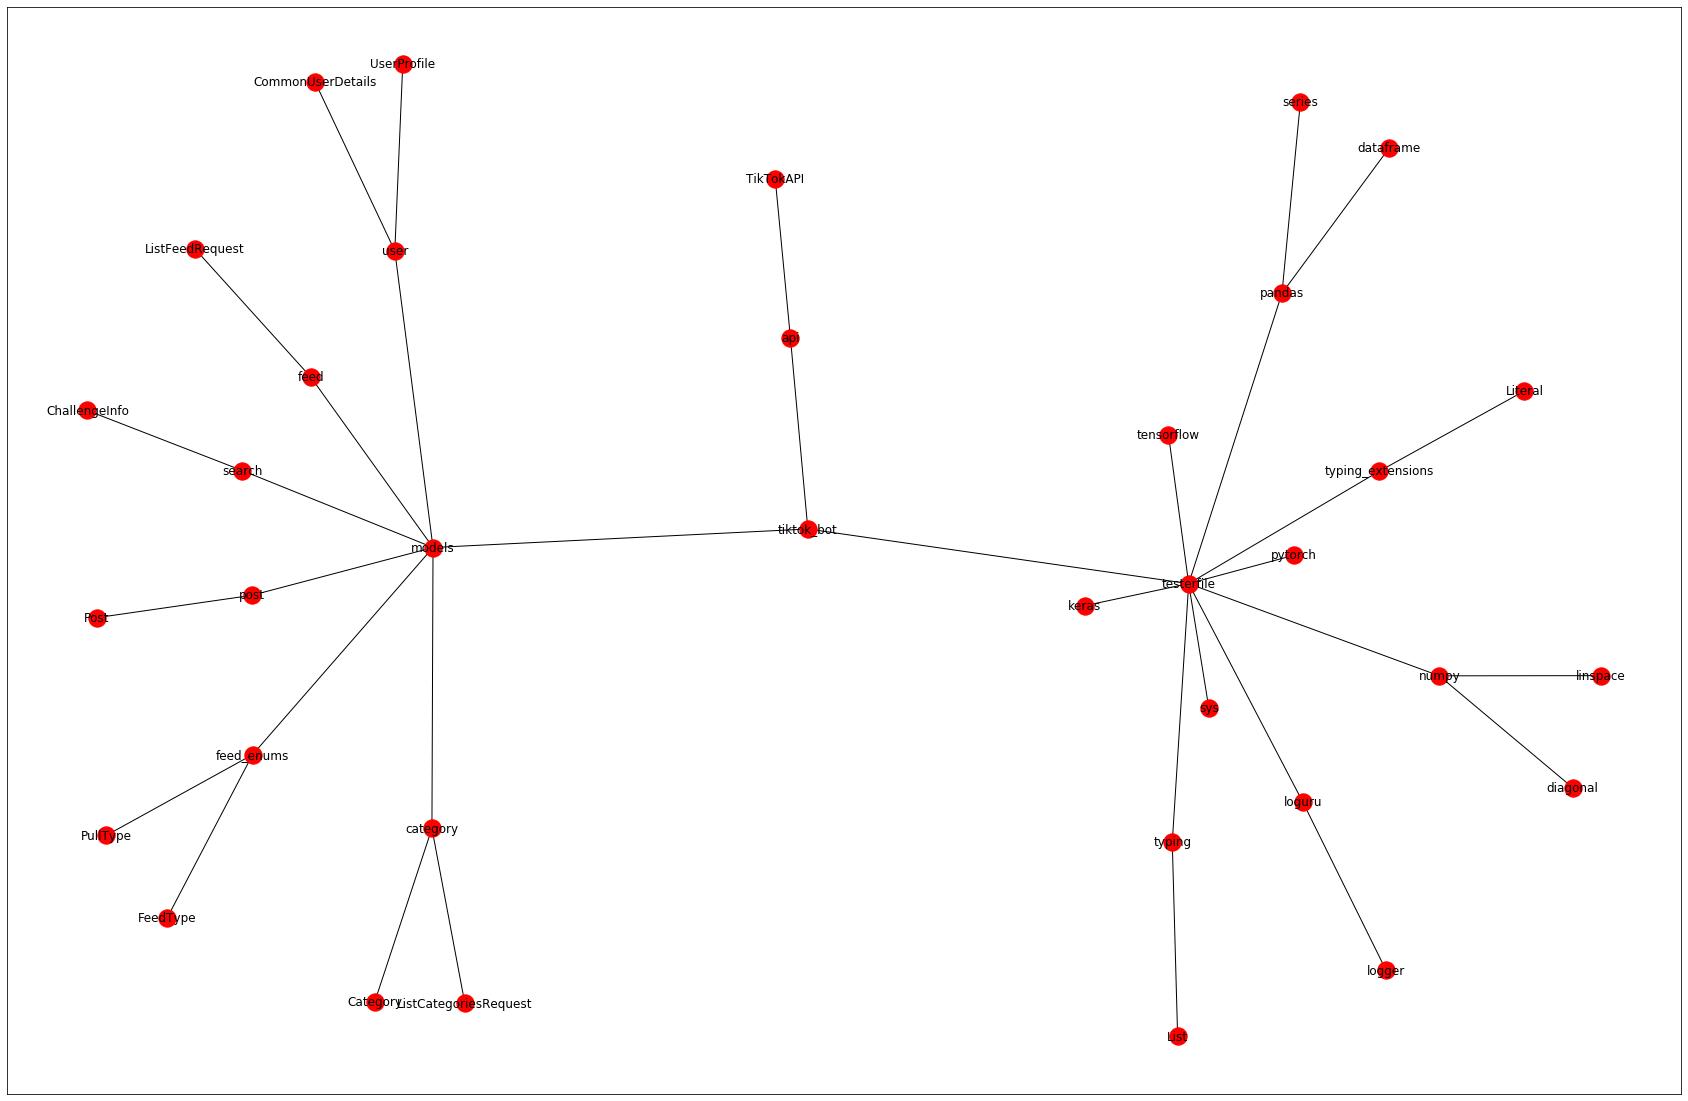

In [15]:
nx.draw_networkx(G, with_labels=True, node_color='r', font_color='k');

In [10]:
G.nodes()

NodeView(('catalyst-master/setup.py', '__future__', 'print_function', 'os', 're', 'sys', 'operator', 'lt', 'gt', 'eq', 'le', 'ge', 'path', '(', 'distutils', 'version', 'StrictVersion', 'setuptools', 'versioneer', 'Cython', 'Distutils', 'build_ext', ''))

In [11]:
G.edges()

EdgeView([('catalyst-master/setup.py', '__future__'), ('catalyst-master/setup.py', 'os'), ('catalyst-master/setup.py', 're'), ('catalyst-master/setup.py', 'sys'), ('catalyst-master/setup.py', 'operator'), ('catalyst-master/setup.py', 'distutils'), ('catalyst-master/setup.py', 'setuptools'), ('catalyst-master/setup.py', 'versioneer'), ('catalyst-master/setup.py', 'Cython'), ('catalyst-master/setup.py', ''), ('__future__', 'print_function'), ('os', 'path'), ('operator', 'lt'), ('operator', 'gt'), ('operator', 'eq'), ('operator', 'le'), ('operator', 'ge'), ('path', '('), ('(', 'setuptools'), ('distutils', 'version'), ('version', 'StrictVersion'), ('Cython', 'Distutils'), ('Distutils', 'build_ext')])

/home/data/anaconda3/envs/DataSci/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


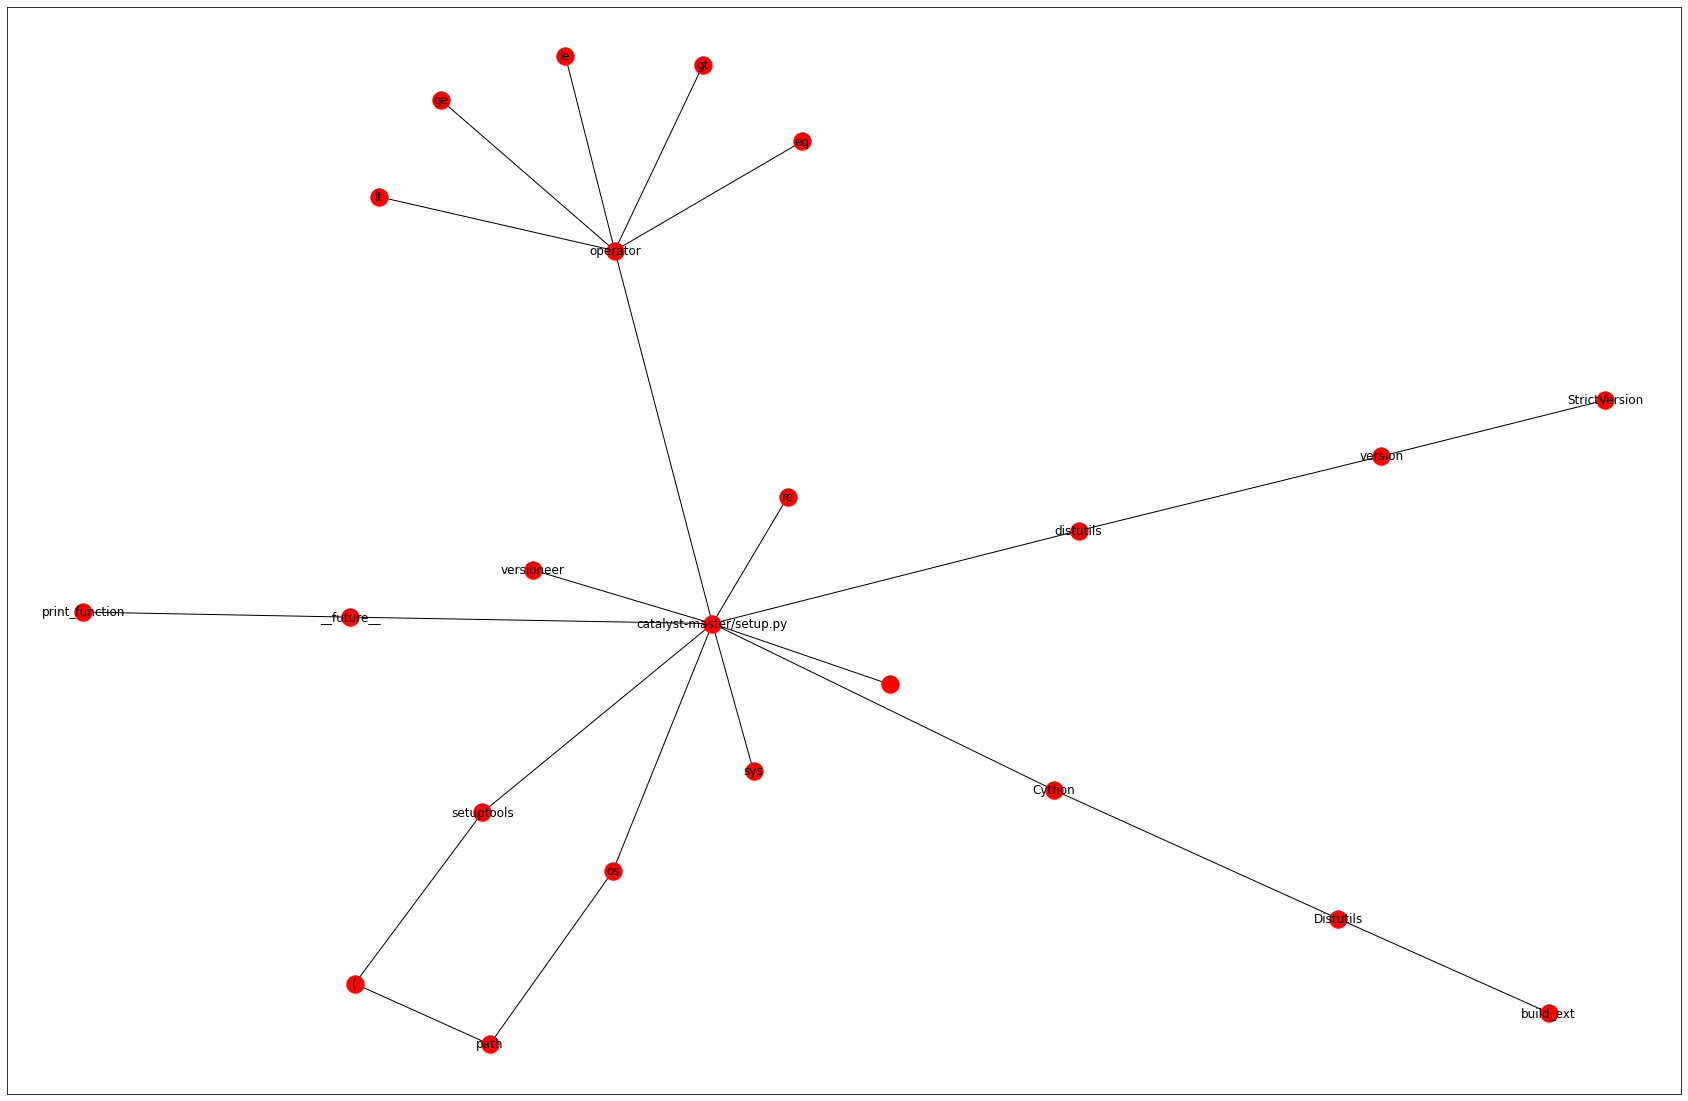

In [12]:
nx.draw_networkx(G, with_labels=True, node_color='r', font_color='k');